In [18]:
import os

import numpy as np
import matplotlib.pyplot as plt

import utoolbox.utils.files as fileutils
from utoolbox.container import Volume

plt.rcParams['figure.figsize'] = (24, 9)

Load file list.

In [12]:
source_folder = "E:\\Aibillton\\20170906_RFiSHG6SCAAX\\deskew\\488"

In [13]:
file_list = fileutils.list_files(source_folder)

In [14]:
background = None
ts_avg = []
ts_std = []
for file_path in file_list:
    data = Volume(file_path)
    avg, std = np.mean(data), np.std(data)
    ts_avg.append(avg)
    ts_std.append(std)
    
    if background is None:
        background = np.copy(data).astype(np.float32)
    else:
        background += data
        background /= 2

<ErrorbarContainer object of 3 artists>

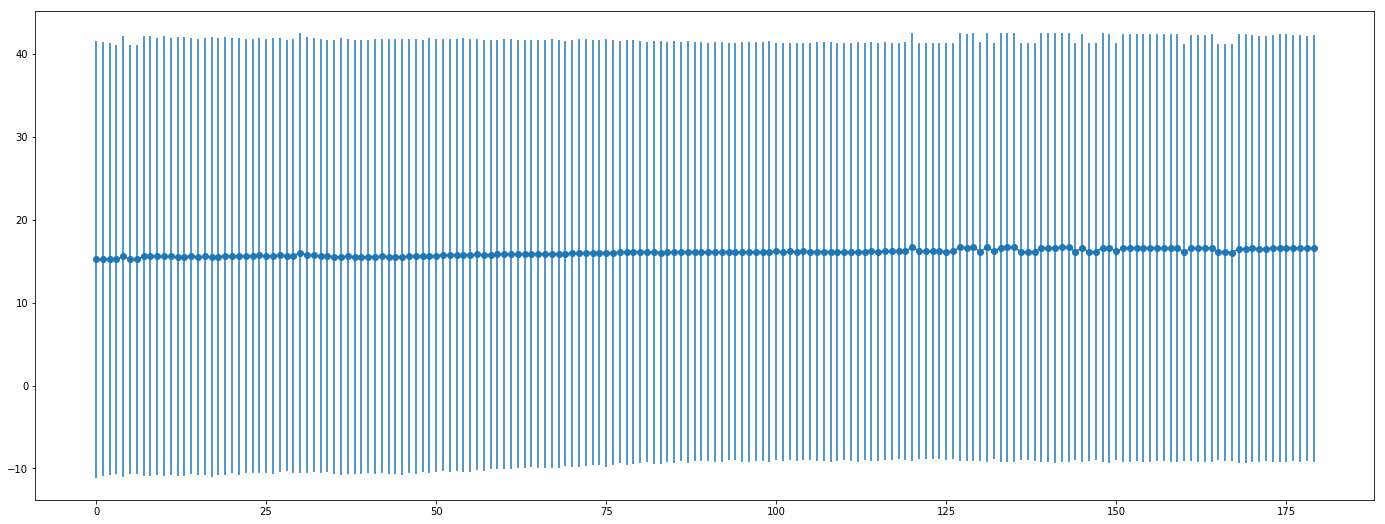

In [19]:
ts = np.arange(len(file_list))
plt.errorbar(ts, ts_avg, ts_std, marker='o')

Text(0,0.5,'Average Intensity')

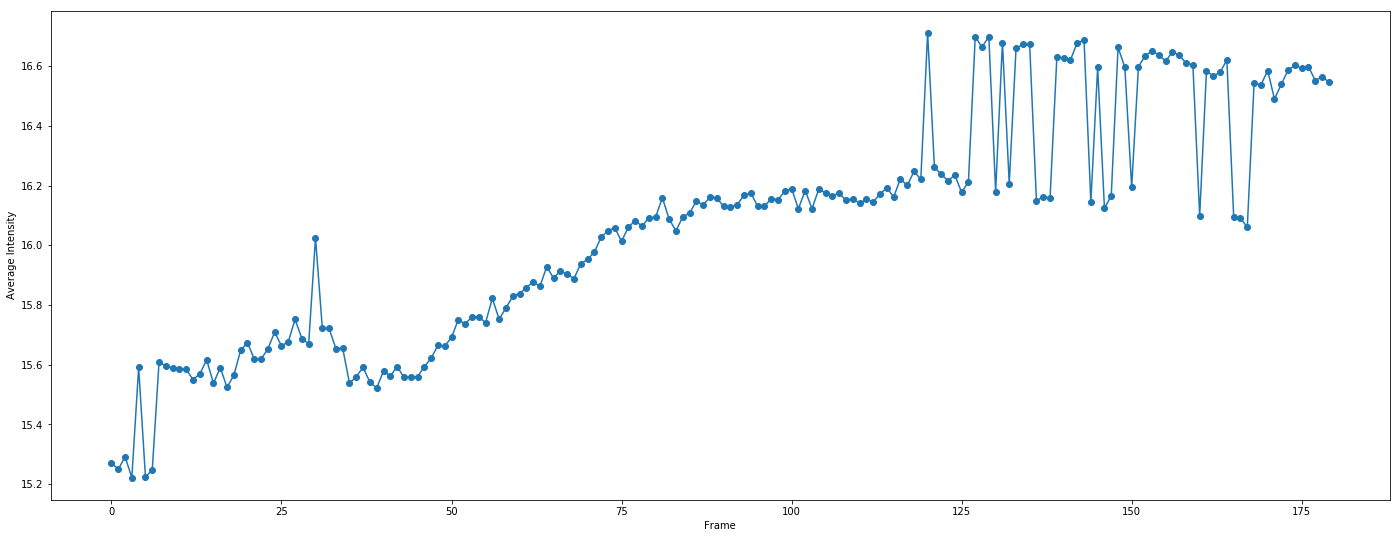

In [23]:
ts = np.arange(len(file_list))
plt.plot(ts, ts_avg, marker='o')
plt.xlabel('Frame')
plt.ylabel('Average Intensity')